In [2]:
import pandas as pd

In [3]:
# Load data
file_path = "data/redlat.genes.chr.counts.hg38_multianno.tsv"
original_df = pd.read_csv(file_path, sep='\t')

# Filter data we care about 
df = original_df[
    (original_df["Func.refGene"] == "exonic") & 
    (original_df["ExonicFunc.refGene"] == "nonsynonymous SNV")
]

In [4]:
# Verify filtering worked
df["AAChange.refGene"].head()

45       TARDBP:NM_007375:exon2:c.G149C:p.C50S
323     TARDBP:NM_007375:exon6:c.A776G:p.N259S
324     TARDBP:NM_007375:exon6:c.G881T:p.G294V
326    TARDBP:NM_007375:exon6:c.A1147G:p.I383V
327    TARDBP:NM_007375:exon6:c.G1154T:p.W385L
Name: AAChange.refGene, dtype: object

In [5]:
desired_isoforms = {
    "PSEN1": "NM_000021",
    "PSEN2": "NM_000447",
    "TARDBP": "NM_007375",
    "MAPT": "NM_005910"
}

In [6]:
# Let's parse all the rows and select the correct variant name
# It will be in the AAChange.refGene column, but there is a lot of fields to parse

def extract_variant(row):
    isoforms = row["AAChange.refGene"].split(",")
    all_affected = row["All_affected"]
    all_unaffected = row["All_unaffected"]

    case_cnt = int(all_affected.split("/")[1])
    control_cnt = int(all_unaffected.split("/")[1])
    
    for isoform in isoforms:
        parts = isoform.split(":")
        if len(parts) < 4:
            continue  # Skip malformed entries

        gene_name, isoform_id = parts[0], parts[1]

        if gene_name not in desired_isoforms:
            continue  # Skip unknown gene names

        if desired_isoforms[gene_name] == isoform_id:
            aavariant = parts[-1][2:]  # Extract amino acid variant
            aa_number = aavariant[1:-1] if len(aavariant) > 2 else ""  # Extract the inner number
            return pd.Series([aavariant, aa_number, case_cnt, control_cnt])

    return pd.Series([None, None, 0, 0])  # Return None if no match found

df[["variant", "AA", "case", "control"]] = df.apply(extract_variant, axis=1)
df = df.dropna(subset=["AA"])
df["case"] = df["case"].astype(int)
df["control"] = df["control"].astype(int)


/var/folders/5n/gkdqz59j4x5c3d4g045zn_n40000gn/T/ipykernel_69457/2832611794.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["variant", "AA", "case", "control"]] = df.apply(extract_variant, axis=1)
/var/folders/5n/gkdqz59j4x5c3d4g045zn_n40000gn/T/ipykernel_69457/2832611794.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["variant", "AA", "case", "control"]] = df.apply(extract_variant, axis=1)
/var/folders/5n/gkdqz59j4x5c3d4g045zn_n40000gn/T/ipykernel_69457/2832611794.py:29: SettingWithCopyWa

In [ ]:
# Now export the selected columns
for gene in desired_isoforms.keys():
    filtered_df = df[df["Gene.refGene"] == gene][["Gene.refGene", "AA", "variant", "case", "control"]]
    file_name = f"output/{gene}.txt"
    filtered_df.to_csv(file_name, index=False, sep='\t')

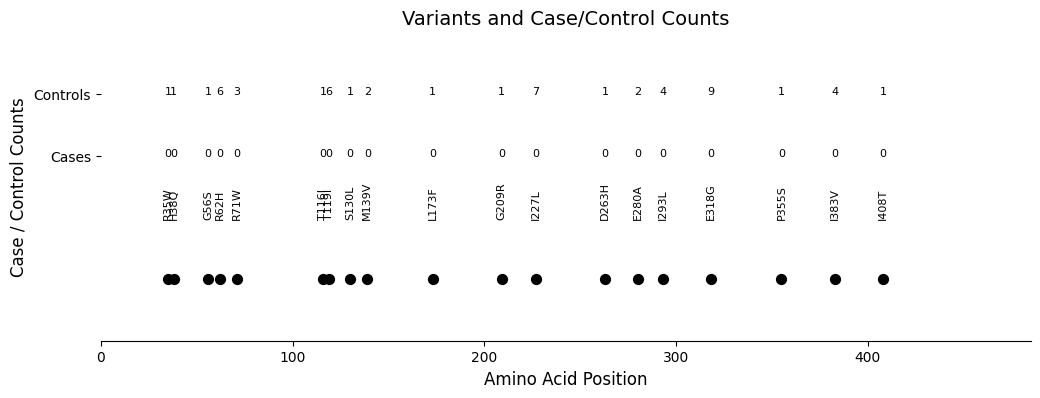

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the variants data
variants = pd.read_csv("variants.txt", sep="\t")  # Adjust separator if needed

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 4))

# Scatter plot for variants
for _, row in variants.iterrows():
    color = "crimson" if row["control"] == 0 else "black"
    if row["case"] == 0 and row["control"] == 0:
        continue

    ax.scatter(row["AA"], 0, color=color, s=50)  # Plot variant position
    ax.text(row["AA"], 0.05, row["variant"], rotation=90, ha="center", fontsize=8, color=color)  # Label variants
    ax.text(row["AA"], 0.1, str(row["case"]), ha="center", fontsize=8, color=color)
    ax.text(row["AA"], 0.15, str(row["control"]), ha="center", fontsize=8, color=color)

# Formatting
ax.set_xlim(0, variants["AA"].max() + 50)  # Adjust x-axis based on data
ax.set_ylim(-0.05, 0.2)
ax.set_xlabel("Amino Acid Position", fontsize=12)
ax.set_ylabel("Case / Control Counts", fontsize=12)  # Add y-axis label
ax.set_yticks([0.1, 0.15])
ax.set_yticklabels(["Cases", "Controls"], fontsize=10)  # Label y-axis ticks

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.title("Variants and Case/Control Counts", fontsize=14)
plt.show()


18 [-0.54000229 -0.27310196]
20 [-0.79226876  0.89416713]
19 [ 0.4560487  -0.12717076]
21 [0.99704277 0.89767635]
0 [-0.04054997  0.30319975]
1 [0.74976719 0.75978683]
2 [-0.03151714  0.90075329]
3 [-0.32724206  0.49313926]
4 [-0.5778406  -0.03291986]
5 [ 0.78403179 -0.87950781]
6 [ 0.9371747  -0.70063726]
7 [0.00216498 0.74216568]
8 [ 0.50919505 -0.19069646]
9 [-0.11561131  0.87048957]
10 [ 0.97741916 -0.83380909]
11 [0.08306967 0.21259087]
12 [-0.8096936  -0.39973208]
13 [ 0.55978491 -0.87283071]
14 [-0.5911993   0.99122182]
15 [-0.78076261 -0.43553603]
16 [ 0.21272843 -0.99202956]
17 [-0.83299971 -0.79538823]
22 [-0.70073463 -0.52895376]
23 [0.00667908 0.05952763]
24 [0.41560829 0.99678848]
25 [-0.40023221  0.73725344]
26 [ 0.94409122 -0.39666914]
27 [0.85569366 0.71622777]
28 [0.21971754 0.95844591]
29 [ 0.15474798 -0.03927165]
30 [ 0.62015657 -0.47541672]
31 [-0.51464068 -0.45832819]
32 [ 0.83077595 -0.03758176]
33 [-0.07381433  0.3178201 ]
34 [ 0.41916941 -0.932723  ]
35 [0.70119

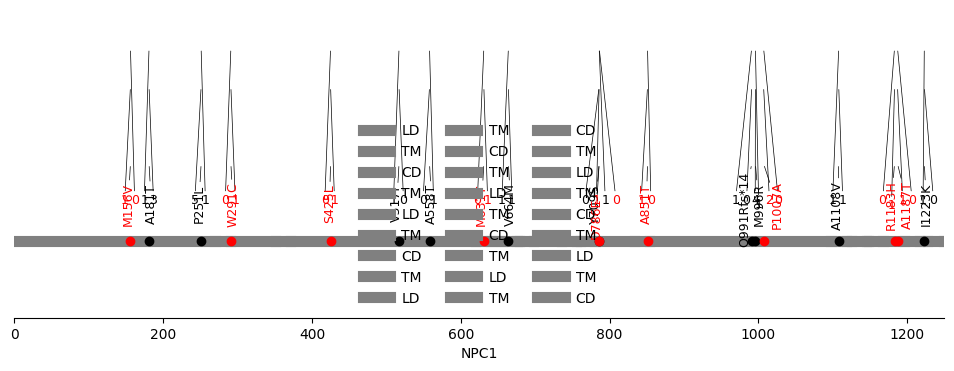

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Example data loading (replace with actual file paths)
domains_df = pd.read_csv("output/NPC1_domains.txt", delimiter="\t")
variants_df = pd.read_csv("output/NPC1_variants.txt", delimiter="\t")

# Define colors for domain types
domain_colors = {"yellowgreen": "yellowgreen", "cyan3": "cyan", "blue": "blue"}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot gene domains
for _, row in domains_df.iterrows():
    ax.plot([row['AA_start'], row['AA_end']], [0, 0], 
            color=domain_colors.get(row['Domain'], "gray"), linewidth=8, label=row['Domain'])

# Plot variants as points
for _, row in variants_df.iterrows():
    ax.scatter(row['AA'], 0, color='red' if row['control'] == 0 else 'black', zorder=3)

# Add variant labels
texts = []
for _, row in variants_df.iterrows():
    text = ax.text(row['AA'], 0.1, row['variant'], fontsize=9, rotation=90, ha='center',
                   color='red' if row['control'] == 0 else 'black')
    texts.append(text)

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', lw=0.5))

# Add case/control counts
texts_counts = []
for _, row in variants_df.iterrows():
    text_case = ax.text(row['AA'], 0.2, str(row['case']), fontsize=9, ha='center',
                        color='red' if row['control'] == 0 else 'black')
    text_control = ax.text(row['AA'], 0.25, str(row['control']), fontsize=9, ha='center',
                           color='red' if row['control'] == 0 else 'black')
    texts_counts.extend([text_case, text_control])

# Adjust case/control labels to prevent overlap
adjust_text(texts_counts, arrowprops=dict(arrowstyle='-', lw=0.5))

# Labels and formatting
ax.set_xlabel("NPC1")
ax.set_yticks([])
ax.set_xlim(0, 1250)
ax.set_ylim(-0.1, 0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(loc='lower center', ncol=3, frameon=False)

plt.show()
